     Customer_ID Feedback_Date Product_ID  Rating  \
0              1     2/16/2018       P001       1   
1              2     4/13/2018       P002       4   
2              3      2/2/2018       P003       1   
3              4      4/8/2018       P004       5   
4              5     2/22/2018       P005       3   
..           ...           ...        ...     ...   
495          496     2/18/2018       P496       4   
496          497      5/5/2018       P497       3   
497          498     6/24/2018       P498       4   
498          499      4/8/2018       P499       2   
499          500     2/15/2018       P500       4   

                                              Comments  
0                     Like start nearly grow add film.  
1    Whom still case door certain century mean abil...  
2                     Follow new special beat address.  
3     Development strong lose send certain say health.  
4                        Seem response quickly budget.  
..                   

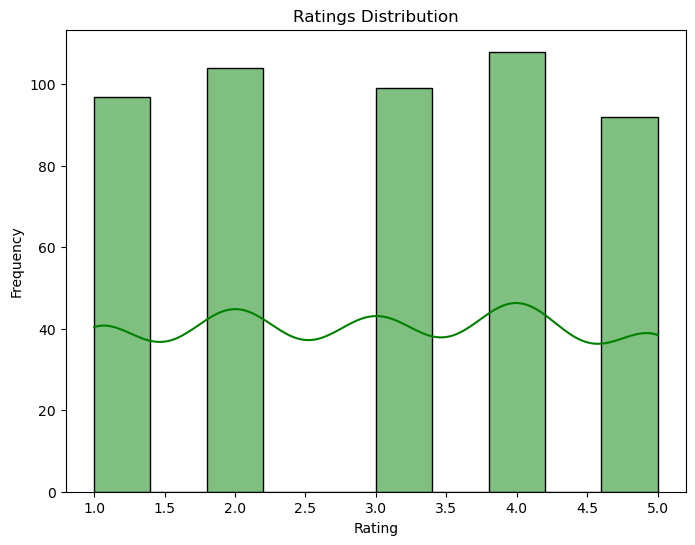

Average Rating: 2.988


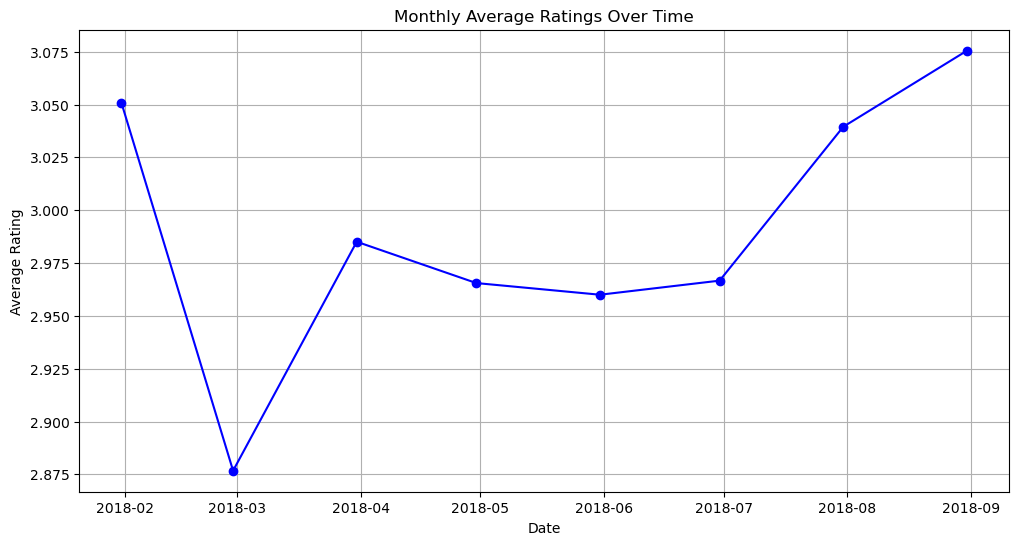

In [22]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import wordcloud as WordCloud
import string

df=pd.read_csv("sample_customer_feedback.csv")
df.shape
df.head(10)
print(df)
print(df.isnull().sum())
print(df.dtypes)
df['Feedback_Date'] = pd.to_datetime(df['Feedback_Date'], errors='coerce')
print(df['Feedback_Date'].dtypes)
df['Comments'] = df['Comments'].astype(str)
print(df['Comments'].dtypes)
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())
def clean_text(text):
    text = text.strip()
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens
df['Comments'] = df['Comments'].astype(str).apply(clean_text)
print(df['Comments'].head())
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='green')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
average_rating = df['Rating'].mean()
print("Average Rating:", average_rating)

df.set_index('Feedback_Date', inplace=True)

# Resample data monthly to get the average rating per month
monthly_avg_rating = df['Rating'].resample('ME').mean()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_rating, marker='o', color='b')
plt.title('Monthly Average Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()
df.to_csv("result.csv", index=False)
